In [5]:
import numpy as np
# import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t as stud
from scipy.stats import chi2
from math import sqrt
from math import log
# %matplotlib inline

1) Довірчі інтервали для нормального розподілу

In [6]:
gamma = 0.05

1.1) Для мат. сподівання $M \xi =a$ в припущенні, що відомо $D \xi=1$.

In [10]:
def conf_int_for_a(n, sigma):
    z_gamma = norm.ppf(1-gamma, loc = 0, scale=1)
    sel = np.random.normal(size = n, loc = 0, scale = sigma)
    a_est = np.mean(sel)
    a = a_est - z_gamma*sigma/sqrt(n)
    b = a_est + z_gamma*sigma/sqrt(n)
    print('Довірчий інтервал: [{0}, {1}]'.format(a, b))
    print('Довжина інтервалу: {0}'.format(abs(b-a)))
    return abs(b-a)

a) $n = 100$

In [11]:
length_1 = conf_int_for_a(100, 1)

Довірчий інтервал: [-0.20636933038452474, 0.12260139500576969]
Довжина інтервалу: 0.3289707253902944


b) $n=1000$

In [12]:
length_2 = conf_int_for_a(1000, 1)

Довірчий інтервал: [-0.06012381695901961, 0.04390586061609186]
Довжина інтервалу: 0.10402967757511147


c) $n=10000$

In [13]:
length_3 = conf_int_for_a(10000, 1)

Довірчий інтервал: [-0.017379325613681156, 0.015517746925348288]
Довжина інтервалу: 0.032897072539029446


d) $n=100000$

In [14]:
length_4 = conf_int_for_a(100000, 1)

Довірчий інтервал: [-0.004387648697253539, 0.006015319060257608]
Довжина інтервалу: 0.010402967757511147


Обчислимо швидкість збіжності нашого довірчого інтервалу. При кожному обчисленні збільшували розмір вибірки в 10 разів, а тому очікуємо побачити швидкість збіжності $\frac{1}{\sqrt{n}}=\frac{1}{\sqrt{10}}$.

In [15]:
len_change = np.mean(np.array([length_2/length_1,length_3/length_2,length_4/length_3])) 
print("Практична швидкість збіжності: {0}".format(len_change))
print("Теоретична швидкість збіжності: {0}".format(1/sqrt(10)))

Практична швидкість збіжності: 0.31622776601683794
Теоретична швидкість збіжності: 0.31622776601683794


1.2) Для мат. сподівання $M \xi =a$ в припущенні, що не відомо $D \xi$.

In [9]:
def conf_int_for_a_no_sigma(n):
    sel = np.random.normal(size = n, loc = 0, scale = 1)
    a_est = np.mean(sel)
    sigma_est = np.mean(np.square((np.subtract(sel,a_est))))
    z_gamma = stud.ppf(1 - gamma, df = n)
    a = a_est - z_gamma*sigma_est/sqrt(n-1)
    b = a_est + z_gamma*sigma_est/sqrt(n-1)
    print('Довірчий інтервал: [{0}, {1}]'.format(a, b))
    return abs(a-b)

a) $n = 100$

In [10]:
len_1 = conf_int_for_a_no_sigma(100)

Довірчий інтервал: [-0.14728286802763035, 0.10847205871166415]


b) $n = 1000$

In [11]:
len_2 = conf_int_for_a_no_sigma(1000)

Довірчий інтервал: [-0.11574688664319084, -0.009349501565126553]


c) $n = 10000$

In [12]:
len_3 = conf_int_for_a_no_sigma(10000)

Довірчий інтервал: [-0.024752569506571565, 0.008018166397090541]


d) $n = 100000$

In [13]:
len_4 = conf_int_for_a_no_sigma(100000)

Довірчий інтервал: [-0.008509313240013174, 0.001938508261791197]


In [14]:
len_change = np.mean(np.array([len_2/len_1,len_3/len_2,len_4/len_3])) 
print("Практична швидкість збіжності: {0}".format(len_change))
print("Теоретична швидкість збіжності: {0}".format(1/sqrt(10)))

Практична швидкість збіжності: 0.34761061325849174
Теоретична швидкість збіжності: 0.31622776601683794


1.3) Для мат. сподівання у припущенні, що не відомо, що розподіл нормальний.

In [15]:
def conf_int_for_a_no_dist(n):
    sel = np.random.normal(size = n, loc = 0, scale = 1)
    a_est = np.mean(sel)
    sigma_est = 1/(n-1)*(np.sum(np.square(sel)) - (1/n)*a_est**2)
    z_gamma = norm.ppf(1-gamma, loc = 0, scale=1)
    a = a_est - z_gamma*sigma_est/sqrt(n)
    b = a_est + z_gamma*sigma_est/sqrt(n)
    print('Довірчий інтервал: [{0}, {1}]'.format(a, b))
    return abs(a-b)

a) $n = 100$

In [16]:
len_1 = conf_int_for_a_no_dist(100)

Довірчий інтервал: [-0.2226335710462683, 0.0799063234437659]


b) $n = 1000$

In [17]:
len_2 = conf_int_for_a_no_dist(1000)

Довірчий інтервал: [-0.06721913772660075, 0.03422413505978705]


c) $n=10000$

In [18]:
len_3 = conf_int_for_a_no_dist(10000)

Довірчий інтервал: [-0.012703153576756401, 0.020212619563252335]


d) $n=100000$

In [19]:
len_4 = conf_int_for_a_no_dist(100000)

Довірчий інтервал: [-0.00715552901446762, 0.0032528190750406505]


In [20]:
len_change = np.mean(np.array([len_2/len_1,len_3/len_2,len_4/len_3])) 
print("Практична швидкість збіжності: {0}".format(len_change))
print("Теоретична швидкість збіжності: {0}".format(1/sqrt(10)))

Практична швидкість збіжності: 0.3253305604574648
Теоретична швидкість збіжності: 0.31622776601683794


2) Довірчий інтервал для $\sigma^2$

In [21]:
gamma = 0.05

In [22]:
def conf_int_for_sigma_square(n):
    z_gamma_1 = chi2.ppf(gamma, df = n-1)
    z_gamma_2 = chi2.ppf(1-gamma, df = n-1)
    sel = np.random.normal(size = n, loc = 0, scale = 1)
    a_est = np.mean(sel)
    sigma_est = np.mean(np.square((np.subtract(sel,a_est))))
    a = (n*sigma_est)/z_gamma_2
    b = (n*sigma_est)/z_gamma_1
    print('Довірчий інтервал: [{0}, {1}]'.format(a, b))
    return abs(a - b)

2.1) $n=100$

In [23]:
len_1 = conf_int_for_sigma_square(100)

Довірчий інтервал: [0.7199571552571785, 1.1514744147764846]


2.2) $n=1000$

In [24]:
len_2 = conf_int_for_sigma_square(1000)

Довірчий інтервал: [0.9026291141254789, 1.0458326414229622]


2.3) $n=10000$

In [25]:
len_3 = conf_int_for_sigma_square(10000)

Довірчий інтервал: [0.9633801192293767, 1.0092632239469779]


2.4) $n=100000$

In [26]:
len_4 = conf_int_for_sigma_square(100000)

Довірчий інтервал: [0.9950866081534518, 1.009834698282898]


In [27]:
len_change = np.mean(np.array([len_2/len_1,len_3/len_2,len_4/len_3])) 
print("Практична швидкість збіжності: {0}".format(len_change))
print("Теоретична швидкість збіжності: {0}".format(1/sqrt(10)))

Практична швидкість збіжності: 0.32456426763434804
Теоретична швидкість збіжності: 0.31622776601683794


3) Обчислення інтегралу $I=P\{\xi < \eta\}$ двома способами, де $\xi \sim F(u)$, $\eta \sim G(u)$.

In [28]:
def F(u, alpha):
    return 1 - np.exp(-((alpha * u) ** 2))
def G(u):
    return 1 - np.exp(-(u ** 3))

3.1) Перший спосіб: обчислюємо ймовірність за формулою $$I=\int_{0}^{\infty}{F(u) dG(u)}$$

Якщо $\omega \sim U([0,1])$, то $\eta = (\ln (-\omega))^{\frac{1}{3}}$, і в такому разі $\eta \sim G(u)$.

In [29]:
def gen_eta(n):
    sel = np.random.uniform(size = n, low = 0, high = 1)
    trans = np.vectorize(lambda t: (-log(t))**(1/3))
    sel = trans(sel)
    return sel

З іншого боку той самий інтеграл можна обчислити як: $$I=MF(\eta)$$
Таким чином, якщо зможемо згенерувати вибірку $\eta_1,\ldots,\eta_n$, застосувати до кожного елементу функцію $F(\eta_1),\ldots,F(\eta_n)$, тоді за законом великих чисел: $$\frac{F(\eta_1)+\ldots+F(\eta_n)}{n} \longrightarrow MF(\eta)$$
при $n \to \infty$.


In [30]:
def math_exp(sel):
    return np.mean(sel)

Коли знайшли значення $n$, яке забезпечує потрібну точність, повертаємо значення інтегралу.

In [31]:
def find_n_and_I(n_zero, alpha, eps):
    i = n_zero
    temp = 0
    curr = 1
    while (abs(temp - curr) > eps):
        temp = curr
        sel = gen_eta(i)
        sel = F(sel, alpha)
        curr = math_exp(sel)
        i = i + 1
    return i, curr

3.2) Другий спосіб: обчислюємо ймовірність за формулою $$I=\int_{0}^{\infty}{(1-G(u)) dF(u)}$$

Якщо $\omega \sim U([0,1])$, то $\xi = -\frac{1}{\alpha}(\ln \omega)^{\frac{1}{2}}$, і в такому разі $\xi \sim F(u)$.

In [32]:
def gen_xi(n, alpha):
    sel = np.random.uniform(size = n, low = 0, high = 1)
    trans = np.vectorize(lambda t: (1/alpha)*sqrt(-log(t)))
    sel = trans(sel)
    return sel

In [33]:
def find_n_and_I_v2(n_zero, alpha, eps):
    i = n_zero
    temp = 0
    curr = 1
    while (abs(temp - curr) > eps):
        temp = curr
        sel = gen_xi(i, alpha)
        sel = 1 - G(sel)
        curr = math_exp(sel)
        i = i + 1
    return i, curr

Перевірити знайдене значення $I$ можна за допомогою методу Монте-Карло: генеруємо великі вибірки $\{\xi_{i}\}$, $\{\eta_{i}\}$,$i=\overline{1,n}$ а потім обчислюємо кількість пар $(\xi_{i}, \eta_{i})$ таких, що $\xi_{i}<\eta_{i}$. Шукану ймовірність апроксимуємо частотою такої події.

In [34]:
def find_I_MK(n, alpha):
    xi = gen_xi(n, alpha)
    eta = gen_eta(n)
    prob = np.sum(xi<eta)/n
    return prob       

In [35]:
find_I_MK(10000000, 0.1)

0.0089872

Перевіримо реалізовані функції на вхідних даних:

In [36]:
n_zero = 100
alpha = 0.1
eps = 0.0001

In [37]:
find_n_and_I(n_zero, alpha, eps)

(106, 0.008155315118219568)

In [38]:
find_n_and_I_v2(n_zero, alpha, eps)

(111, 2.288621703261384e-09)

Перевизначимо вхідні параметри:

In [39]:
n_zero = 1000
alpha = 0.1
eps = 0.0001

In [40]:
find_n_and_I(n_zero, alpha, eps)

(1003, 0.008914074022944881)

In [41]:
find_n_and_I_v2(n_zero, alpha, eps)

(1094, 0.00844467793451963)

Перевизначимо вхідні параметри:

In [42]:
n_zero = 10000
alpha = 0.1
eps = 0.0001

In [43]:
find_n_and_I(n_zero, alpha, eps)

(10003, 0.008954225614678533)

In [44]:
find_n_and_I_v2(n_zero, alpha, eps)

(10011, 0.008614128485914205)

Перевизначимо вхідні параметри:

In [45]:
n_zero = 100000
alpha = 0.1
eps = 0.0001

In [46]:
find_n_and_I(n_zero, alpha, eps)

(100002, 0.009004953651447748)

In [47]:
find_n_and_I_v2(n_zero, alpha, eps)

(100003, 0.008713612537937008)

Побудуємо графік збіжності значеннь інтегралу

In [84]:
def plot_I_per_n(n_max, alpha):
    sel = gen_eta(n_max)
    sel = F(sel, alpha)
    I_values = np.array([])
    for i in range(n_max):
        I_values = np.append(I_values, math_exp(sel[:i+1]))
    plt.plot(range (n_max),I_values, '-')

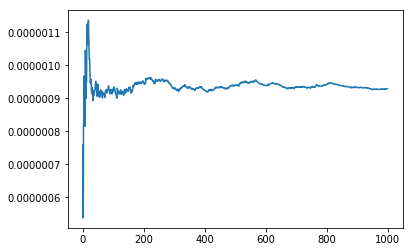

In [94]:
plot_I_per_n(1000, 0.001)

In [89]:
def plot_I_per_n_v2(n_max, alpha):
    sel = gen_xi(n_max, alpha)
    sel = G(sel)
    I_values = np.array([])
    for i in range(n_max):
        I_values = np.append(I_values, math_exp(sel[:i+1]))
    plt.plot(range (n_max),I_values, '-')

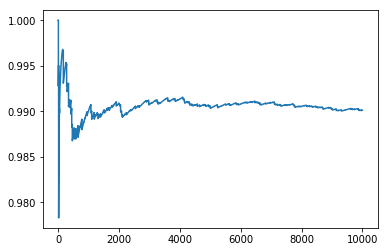

In [92]:
plot_I_per_n_v2(10000, 0.1)